✅ OpenCV dan Matplotlib berhasil diinstall dan diimport!
🚀 MULAI PROGRAM OPERASI DASAR VISI KOMPUTER

1. MEMBUAT DAN MENAMPILKAN CITRA DIGITAL DUMMY


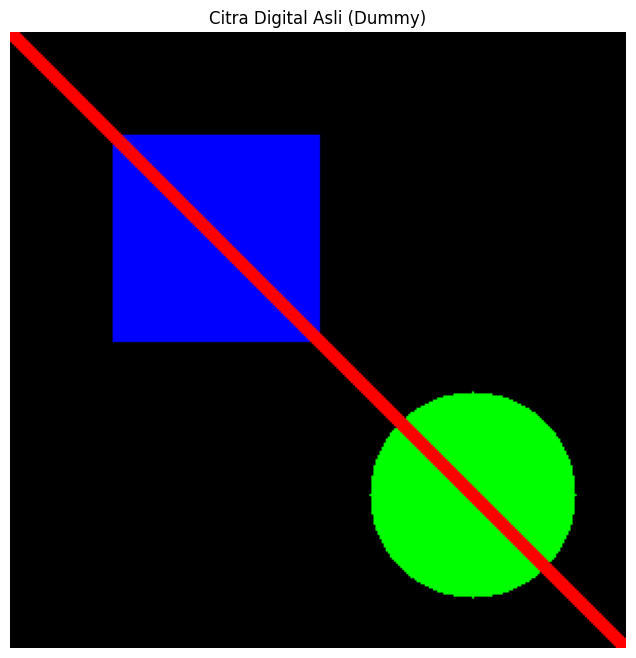


2. MENGKONVERSI CITRA KE GRAYSCALE


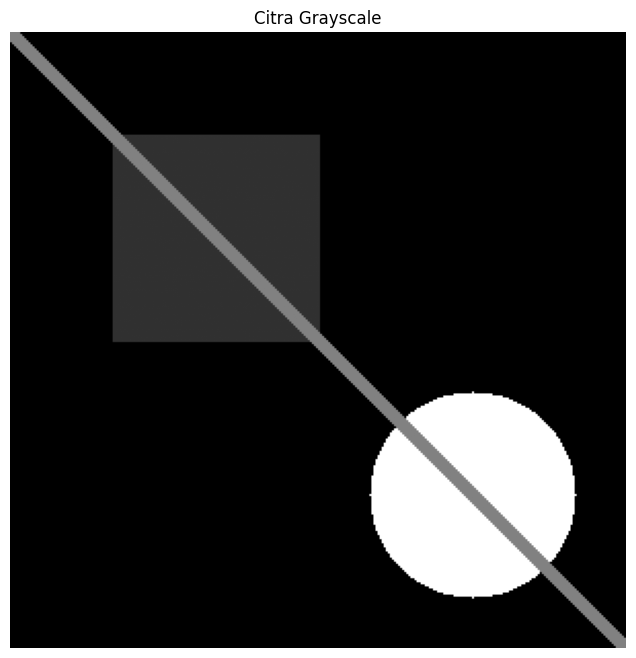


3. MENGHITUNG DAN MENAMPILKAN HISTOGRAM CITRA


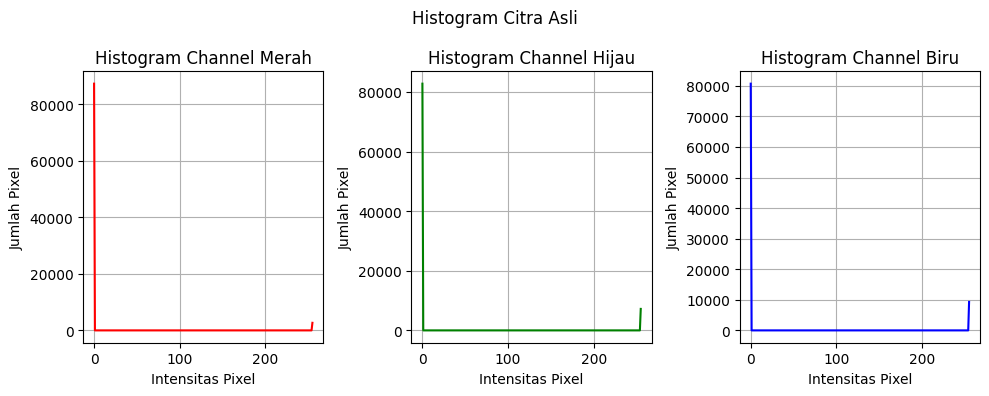

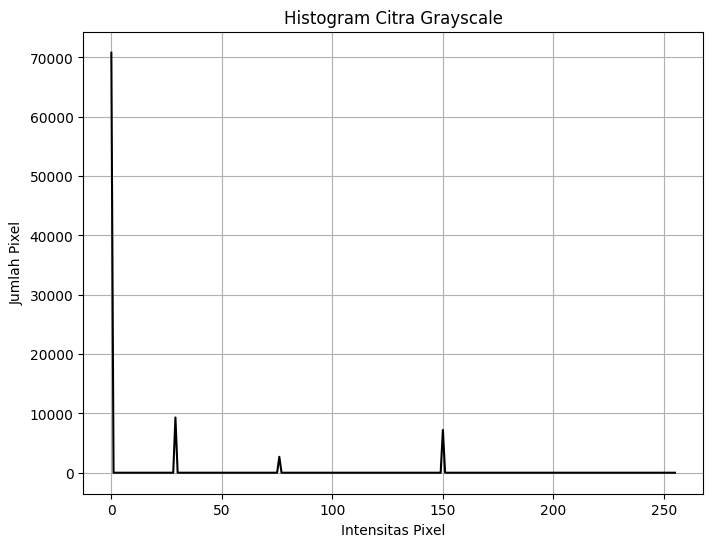


4. MENERAPKAN OPERASI THRESHOLDING


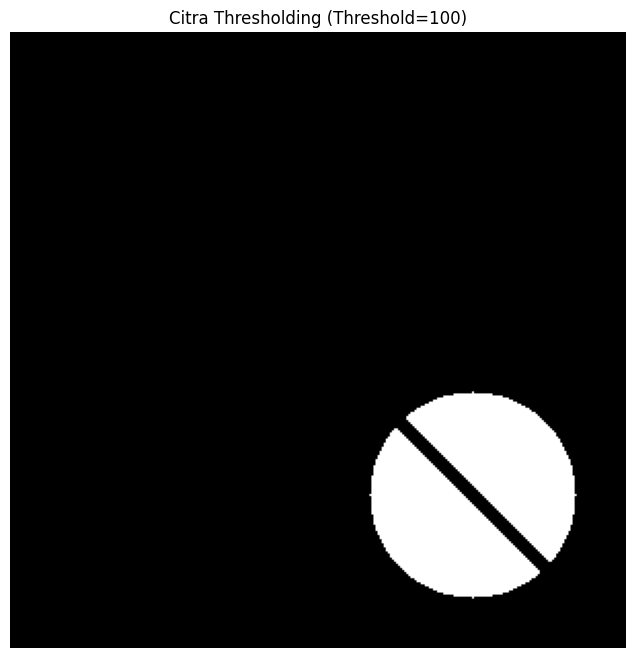

   🔍 Analisis Threshold 100:
      - Total Pixel: 90000
      - Pixel Putih (di atas threshold): 7210 (8.01%)
      - Pixel Hitam (di bawah threshold): 82790 (91.99%)
      - Rasio Putih:Hitam: 7210:82790


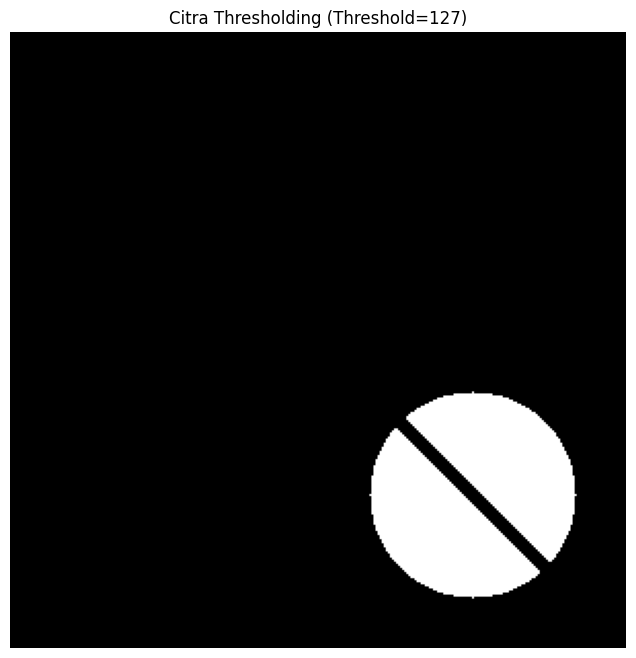

   🔍 Analisis Threshold 127:
      - Total Pixel: 90000
      - Pixel Putih (di atas threshold): 7210 (8.01%)
      - Pixel Hitam (di bawah threshold): 82790 (91.99%)
      - Rasio Putih:Hitam: 7210:82790


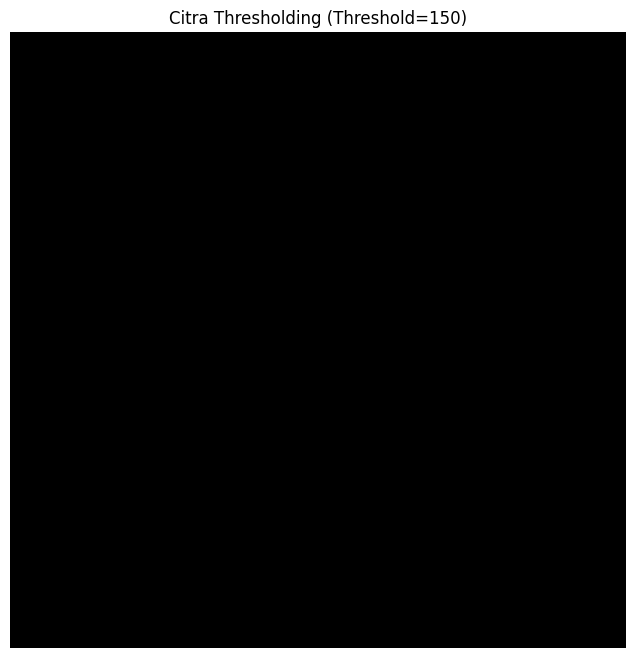

   🔍 Analisis Threshold 150:
      - Total Pixel: 90000
      - Pixel Putih (di atas threshold): 0 (0.00%)
      - Pixel Hitam (di bawah threshold): 90000 (100.00%)
      - Rasio Putih:Hitam: 0:90000

5. MENGIMPLEMENTASIKAN MANIPULASI CITRA


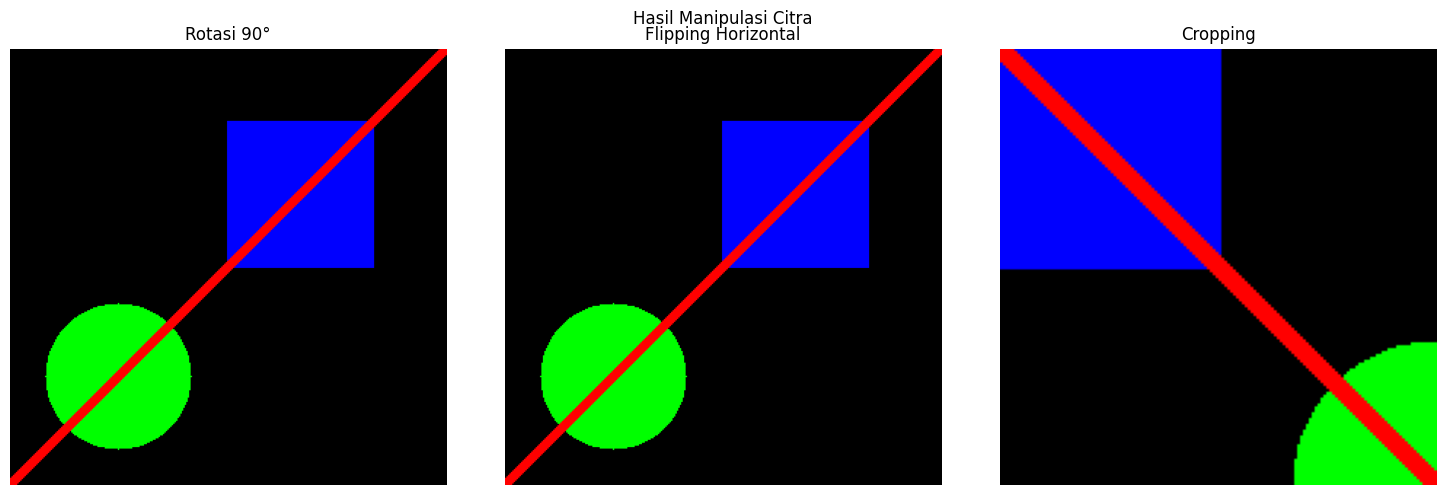


📊 ANALISIS HASIL MANIPULASI CITRA:
   - Rotated: Ukuran 300x300, Area 90000 pixel
     * Rotasi mengubah orientasi citra tanpa mengubah ukuran.
   - Flipped: Ukuran 300x300, Area 90000 pixel
     * Flipping membalik citra secara horizontal.
   - Cropped: Ukuran 150x150, Area 22500 pixel
     * Cropping mengurangi ukuran citra dari 300x300 menjadi 150x150.

🎉 PROGRAM SELESAI!


In [5]:
# -*- coding: utf-8 -*-
"""
Program Sederhana Operasi Dasar Visi Komputer menggunakan OpenCV di Google Colab
Menggunakan minimal tiga struktur data Python: list, dictionary, dan tuple.
Menggunakan citra dummy yang dibuat secara programatik.
"""

# @title Install OpenCV dan Matplotlib
!pip install opencv-python matplotlib --quiet

import cv2
import matplotlib.pyplot as plt
import numpy as np

print("✅ OpenCV dan Matplotlib berhasil diinstall dan diimport!")

# Fungsi untuk membuat citra dummy yang lebih menarik
def create_dummy_image():
    """
    Membuat citra dummy dengan pola sederhana (persegi dan lingkaran).

    Returns:
        numpy.ndarray: Citra dummy RGB.
    """
    # Buat citra kosong berukuran 300x300 dengan 3 channel (RGB)
    height, width = 300, 300
    image = np.zeros((height, width, 3), dtype=np.uint8)

    # Gambar persegi merah di kiri atas
    cv2.rectangle(image, (50, 50), (150, 150), (255, 0, 0), -1) # BGR: Biru

    # Gambar lingkaran hijau di kanan bawah
    cv2.circle(image, (225, 225), 50, (0, 255, 0), -1) # BGR: Hijau

    # Gambar garis diagonal biru
    cv2.line(image, (0, 0), (width, height), (0, 0, 255), 5) # BGR: Merah

    # Konversi dari BGR ke RGB untuk matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image_rgb

# Fungsi untuk membaca dan menampilkan citra digital
def load_and_display_image(image):
    """
    Menampilkan citra yang diberikan.

    Args:
        image (numpy.ndarray): Citra input (format RGB).
    """
    # Tampilkan citra asli
    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    plt.title('Citra Digital Asli (Dummy)')
    plt.axis('off')
    plt.show()

# Fungsi untuk mengkonversi citra ke grayscale
def convert_to_grayscale(image):
    """
    Mengkonversi citra RGB/RGBA menjadi grayscale.

    Args:
        image (numpy.ndarray): Citra input (format RGB).

    Returns:
        numpy.ndarray: Citra grayscale.
    """
    # Konversi ke grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Tampilkan citra grayscale
    plt.figure(figsize=(8, 8))
    plt.imshow(gray_image, cmap='gray')
    plt.title('Citra Grayscale')
    plt.axis('off')
    plt.show()

    return gray_image

# Fungsi untuk menghitung dan menampilkan histogram citra
def calculate_and_display_histogram(image, title="Histogram"):
    """
    Menghitung dan menampilkan histogram dari citra.

    Args:
        image (numpy.ndarray): Citra input (bisa grayscale atau RGB).
        title (str): Judul untuk plot histogram.
    """
    # Jika citra berwarna (3 channel), hitung histogram untuk setiap channel
    if len(image.shape) == 3:
        # Gunakan tuple untuk menyimpan nama channel dan warnanya
        channel_info = (
            ('Merah', 'r'),
            ('Hijau', 'g'),
            ('Biru', 'b')
        )
        plt.figure(figsize=(10, 4))
        for i, (channel_name, color) in enumerate(channel_info):
            hist = cv2.calcHist([image], [i], None, [256], [0, 256])
            plt.subplot(1, 3, i+1)
            plt.plot(hist, color=color)
            plt.title(f'Histogram Channel {channel_name}')
            plt.xlabel('Intensitas Pixel')
            plt.ylabel('Jumlah Pixel')
            plt.grid(True)
        plt.suptitle(title)
        plt.tight_layout()
        plt.show()
    else: # Citra grayscale
        hist = cv2.calcHist([image], [0], None, [256], [0, 256])
        plt.figure(figsize=(8, 6))
        plt.plot(hist, color='black')
        plt.title(title)
        plt.xlabel('Intensitas Pixel')
        plt.ylabel('Jumlah Pixel')
        plt.grid(True)
        plt.show()

# Fungsi untuk menerapkan operasi thresholding
def apply_thresholding(image, threshold_value=127):
    """
    Menerapkan operasi thresholding sederhana (binary) pada citra grayscale.

    Args:
        image (numpy.ndarray): Citra grayscale input.
        threshold_value (int): Nilai ambang batas (threshold). Default: 127.

    Returns:
        numpy.ndarray: Citra hasil thresholding.
    """
    # Terapkan thresholding
    _, binary_image = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)

    # Tampilkan citra hasil thresholding
    plt.figure(figsize=(8, 8))
    plt.imshow(binary_image, cmap='gray')
    plt.title(f'Citra Thresholding (Threshold={threshold_value})')
    plt.axis('off')
    plt.show()

    return binary_image

# Fungsi untuk mengimplementasikan manipulasi citra (rotasi, flipping, cropping)
def apply_image_manipulations(image):
    """
    Mengimplementasikan beberapa jenis manipulasi citra: rotasi, flipping, dan cropping.

    Args:
        image (numpy.ndarray): Citra input (format RGB).

    Returns:
        dict: Dictionary yang berisi citra-citra hasil manipulasi.
    """
    # Rotasi (90 derajat searah jarum jam)
    rotated_image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)

    # Flipping (horizontal)
    flipped_image = cv2.flip(image, 1)

    # Cropping (ambil bagian tengah)
    height, width = image.shape[:2]
    crop_size = min(height, width) // 2
    start_y = (height - crop_size) // 2
    start_x = (width - crop_size) // 2
    cropped_image = image[start_y:start_y+crop_size, start_x:start_x+crop_size]

    # Buat dictionary untuk menyimpan hasil
    manipulated_images = {
        'rotated': rotated_image,
        'flipped': flipped_image,
        'cropped': cropped_image
    }

    # Buat tuple untuk menyimpan informasi tentang setiap manipulasi
    manipulation_info = (
        ("Rotasi 90°", rotated_image),
        ("Flipping Horizontal", flipped_image),
        ("Cropping", cropped_image)
    )

    # Tampilkan hasil manipulasi
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    for ax, (title, img) in zip(axes, manipulation_info):
        ax.imshow(img)
        ax.set_title(title)
        ax.axis('off')

    plt.suptitle('Hasil Manipulasi Citra')
    plt.tight_layout()
    plt.show()

    return manipulated_images

# Fungsi utama untuk menjalankan seluruh proses
def main():
    """
    Fungsi utama yang mengatur alur eksekusi program.
    """
    print("=" * 80)
    print("🚀 MULAI PROGRAM OPERASI DASAR VISI KOMPUTER")
    print("=" * 80)

    # Langkah 1: Membuat dan menampilkan citra dummy
    print("\n1. MEMBUAT DAN MENAMPILKAN CITRA DIGITAL DUMMY")
    original_image = create_dummy_image()
    load_and_display_image(original_image)

    # Langkah 2: Mengkonversi citra ke grayscale
    print("\n2. MENGKONVERSI CITRA KE GRAYSCALE")
    grayscale_image = convert_to_grayscale(original_image)

    # Langkah 3: Menghitung dan menampilkan histogram citra
    print("\n3. MENGHITUNG DAN MENAMPILKAN HISTOGRAM CITRA")
    # Histogram untuk citra asli (jika berwarna)
    if len(original_image.shape) == 3:
        calculate_and_display_histogram(original_image, "Histogram Citra Asli")
    # Histogram untuk citra grayscale
    calculate_and_display_histogram(grayscale_image, "Histogram Citra Grayscale")

    # Langkah 4: Menerapkan operasi thresholding
    print("\n4. MENERAPKAN OPERASI THRESHOLDING")
    # Kita coba beberapa nilai threshold
    thresholds = [100, 127, 150]
    for thresh in thresholds:
        binary_image = apply_thresholding(grayscale_image, thresh)
        # Analisis singkat
        print(f"   🔍 Analisis Threshold {thresh}:")
        total_pixels = binary_image.size
        white_pixels = np.sum(binary_image == 255)
        black_pixels = np.sum(binary_image == 0)
        print(f"      - Total Pixel: {total_pixels}")
        print(f"      - Pixel Putih (di atas threshold): {white_pixels} ({white_pixels/total_pixels*100:.2f}%)")
        print(f"      - Pixel Hitam (di bawah threshold): {black_pixels} ({black_pixels/total_pixels*100:.2f}%)")
        print(f"      - Rasio Putih:Hitam: {white_pixels}:{black_pixels}")

    # Langkah 5: Mengimplementasikan manipulasi citra
    print("\n5. MENGIMPLEMENTASIKAN MANIPULASI CITRA")
    manipulated_results = apply_image_manipulations(original_image)

    # Analisis singkat hasil manipulasi
    print("\n📊 ANALISIS HASIL MANIPULASI CITRA:")
    for key, img in manipulated_results.items():
        height, width = img.shape[:2]
        area = height * width
        print(f"   - {key.capitalize()}: Ukuran {width}x{height}, Area {area} pixel")
        if key == 'cropped':
            print(f"     * Cropping mengurangi ukuran citra dari {original_image.shape[1]}x{original_image.shape[0]} menjadi {width}x{height}.")
        elif key == 'rotated':
            print(f"     * Rotasi mengubah orientasi citra tanpa mengubah ukuran.")
        elif key == 'flipped':
            print(f"     * Flipping membalik citra secara horizontal.")

    print("\n🎉 PROGRAM SELESAI!")
    print("=" * 80)

# Jalankan program
if __name__ == "__main__":
    main()